<a href="https://colab.research.google.com/github/TrushaAsarhad/AI-ML/blob/main/Wine_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Theory Knowledge**

Clustering is a type of unsupervised learning used to find patterns or groupings within data. Unlike supervised learning, clustering does not rely on labeled outcomes and instead seeks to organize data points into meaningful structures. Here’s a detailed overview of the theory behind clustering, key concepts, and commonly used algorithms.

### Important Concepts in Clustering

1. **Cluster:**
   - A collection of data points aggregated together because of certain similarities.
   - Clusters can vary in shape, size, and density.

2. **Centroid:**
   - The center point of a cluster.
   - In algorithms like K-Means, the centroid is the mean of all points in the cluster.

3. **Inertia (Within-cluster Sum of Squares):**
   - A measure of how tightly the data points are clustered around the centroids.
   - Lower inertia indicates better-defined clusters.

4. **Distance Metrics:**
   - Metrics used to measure the similarity or dissimilarity between data points.
   - Common distance metrics include Euclidean distance, Manhattan distance, and Cosine similarity.

5. **Types of Clustering:**
   - **Hard Clustering:** Each data point belongs to a single cluster (e.g., K-Means).
   - **Soft Clustering:** Each data point can belong to multiple clusters with varying degrees of membership (e.g., Gaussian Mixture Models).

### Key Clustering Algorithms

1. **K-Means Clustering:**
   - **Objective:** Partition the dataset into K clusters, where each data point belongs to the cluster with the nearest mean.
   - **Algorithm Steps:**
     1. Initialize K centroids randomly.
     2. Assign each data point to the nearest centroid.
     3. Recalculate the centroids as the mean of the points in each cluster.
     4. Repeat steps 2 and 3 until convergence (no change in centroids or a maximum number of iterations reached).
   - **Pros:** Simple, efficient for large datasets, easy to implement.
   - **Cons:** Requires pre-specifying the number of clusters (K), sensitive to initial centroid placement, may converge to local minima.

2. **Hierarchical Clustering:**
   - **Objective:** Build a hierarchy of clusters either through a bottom-up approach (agglomerative) or top-down approach (divisive).
   - **Algorithm Steps (Agglomerative):**
     1. Start with each data point as a single cluster.
     2. Merge the closest pair of clusters based on a distance metric.
     3. Repeat until all points are merged into a single cluster.
     4. Dendrograms are often used to visualize the cluster hierarchy.
   - **Pros:** Does not require specifying the number of clusters, produces a hierarchy that can be cut at different levels.
   - **Cons:** Computationally intensive for large datasets, less effective with noisy data.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**
   - **Objective:** Identify clusters based on the density of data points.
   - **Algorithm Steps:**
     1. Select a random point and check if it has at least a minimum number of neighboring points (minPts) within a given radius (epsilon).
     2. If it does, start a new cluster; otherwise, mark it as noise.
     3. Expand the cluster by recursively including all density-reachable points.
   - **Pros:** Does not require specifying the number of clusters, can find arbitrarily shaped clusters, robust to noise.
   - **Cons:** Difficult to choose appropriate values for epsilon and minPts, struggles with varying density clusters.

4. **Gaussian Mixture Models (GMM):**
   - **Objective:** Model the data as a mixture of several Gaussian distributions.
   - **Algorithm Steps:**
     1. Initialize the parameters (means, covariances, and mixture weights) of K Gaussian distributions.
     2. Expectation Step (E-step): Compute the probability that each data point belongs to each Gaussian distribution.
     3. Maximization Step (M-step): Update the parameters of the Gaussian distributions to maximize the likelihood of the data.
     4. Repeat steps 2 and 3 until convergence.
   - **Pros:** Soft clustering, can model clusters with different shapes and sizes, probabilistic interpretation.
   - **Cons:** Requires specifying the number of components, sensitive to initialization, computationally intensive.

### Evaluation of Clustering

Since clustering is unsupervised, evaluating the results can be challenging. Some common evaluation metrics include:

1. **Silhouette Score:**
   - Measures how similar a point is to its own cluster compared to other clusters.
   - Ranges from -1 (incorrect clustering) to +1 (highly dense clustering).

2. **Davies-Bouldin Index:**
   - Computes the average similarity ratio of each cluster with its most similar cluster.
   - Lower values indicate better clustering.

3. **Adjusted Rand Index (ARI):**
   - Measures the similarity between the true labels and the clustering results.
   - Corrects for chance, ranging from -1 to 1.

4. **Calinski-Harabasz Index:**
   - Ratio of the sum of between-cluster dispersion and within-cluster dispersion.
   - Higher values indicate better-defined clusters.

### Practical Resources and Projects

1. **Customer Segmentation:**
   - **Dataset:** [Kaggle Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)
   - **Tutorial:** [K-Means Clustering with Python](https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3)

2. **Document Clustering:**
   - **Dataset:** [20 Newsgroups Dataset](http://qwone.com/~jason/20Newsgroups/)
   - **Tutorial:** [Text Clustering with Scikit-Learn](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html)

3. **Image Segmentation:**
   - **Dataset:** [COCO Dataset](https://cocodataset.org/#home)
   - **Tutorial:** [K-Means Clustering for Image Segmentation](https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/)

4. **Anomaly Detection:**
   - **Dataset:** [NAB: The Numenta Anomaly Benchmark](https://github.com/numenta/NAB)
   - **Tutorial:** [DBSCAN for Anomaly Detection](https://towardsdatascience.com/anomaly-detection-with-dbscan-1e2b9afc531c)

By understanding the theory behind clustering and working on practical projects, you'll build a strong foundation in unsupervised learning, which is a valuable skill set for an ML engineer.

first wcss formula then kmeans clustering and then visualaiztion

# **Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/wine-clustering.csv')

In [ ]:
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
df.shape

(178, 13)

In [ ]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

## **some info**

Alcohol: Represents the alcohol content in the wine, which is a crucial factor in wine classification and quality assessment.

Malic Acid: Indicates the amount of malic acid present in the wine, which affects its acidity and flavor profile.

Ash: Refers to the ash content of the wine, which is a measure of mineral content and can influence its structure and mouthfeel.

Ash_Alcanity: Represents the alkalinity of ash in the wine, which can affect its pH and overall taste.

Magnesium: Indicates the magnesium concentration in the wine, which may correlate with soil composition and grape growing conditions.

Total Phenols: Represents the total phenolic content in the wine, which contributes to its color, flavor, and antioxidant properties.

Flavanoids: Refers to the flavonoid compounds present in the wine, which play a role in color stability, bitterness, and aroma.

Nonflavanoid Phenols: Indicates the concentration of non-flavonoid phenolic compounds, which can contribute to wine bitterness and astringency.

Proanthocyanins: Represents the proanthocyanidin content in the wine, which contributes to its mouthfeel, structure, and aging potential.

Color Intensity: Indicates the intensity of color in the wine, which can vary depending on grape variety, fermentation techniques, and aging.

Hue: Represents the hue of the wine, which reflects its color spectrum and can provide insights into its maturity and aging.

OD280: Indicates the optical density at 280 nm, which can be related to protein content and wine stability.

Proline: Represents the proline content in the wine, which is an amino acid that may influence its aroma, flavor, and aging potential.

Each of these features captures different aspects of the chemical composition and sensory characteristics of the wine, making them valuable for clustering wine samples based on their similarities and differences. Therefore, all columns appear to be essential for the clustering process in this context.

# **Elbow Method**

Within Cluster Sum of Square to find the number of Clusters

In [ ]:
# elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

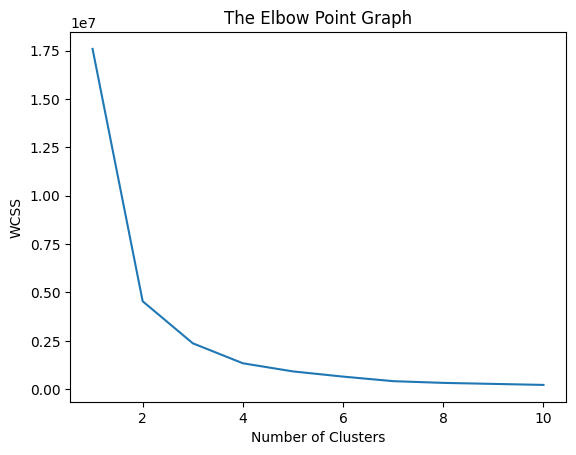

In [ ]:
# plot an elbow graph
# i gues wcss has shape of(1,) but we need one d array so
#wcss = np.array(wcss)
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# there is  a code to identify the elbow point but we can also tell by looking 4 maybe here
elbow_point = np.argmin(np.diff(wcss)) + 1

print("The Elbow Point is at cluster number:", elbow_point)

The Elbow Point is at cluster number: 1


In [ ]:
# optimum is 3
kmeans= KMeans(n_clusters=3, init='k-means++',random_state=0)

# return label for each cluster
Y = kmeans.fit_predict(df)
print(Y)




[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Visualization**

In [ ]:
X = np.array(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


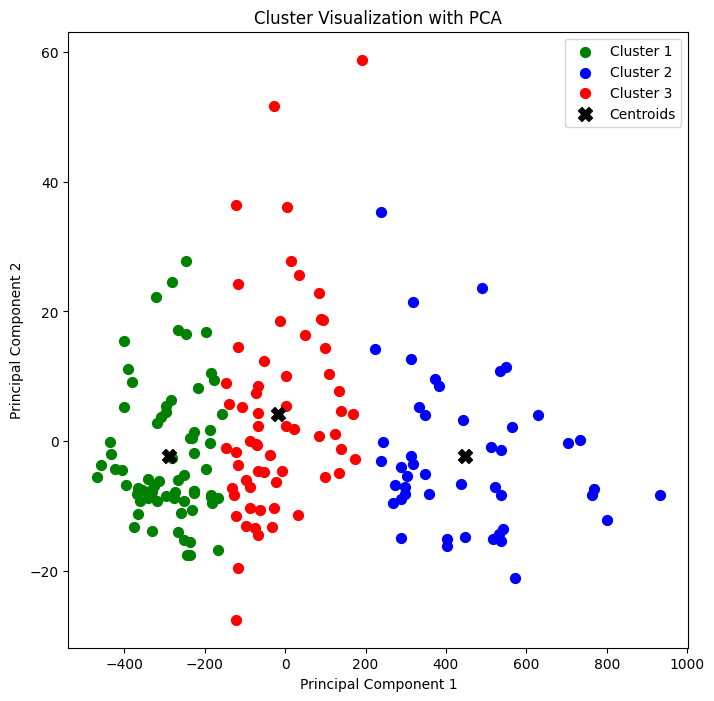

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Fit KMeans and predict clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
Y = kmeans.fit_predict(df)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = Y

# Plot the PCA components with cluster coloring
plt.figure(figsize=(8, 8))
plt.scatter(pca_df[pca_df['Cluster'] == 0]['PC1'], pca_df[pca_df['Cluster'] == 0]['PC2'], s=50, c='green', label='Cluster 1')
plt.scatter(pca_df[pca_df['Cluster'] == 1]['PC1'], pca_df[pca_df['Cluster'] == 1]['PC2'], s=50, c='blue', label='Cluster 2')
plt.scatter(pca_df[pca_df['Cluster'] == 2]['PC1'], pca_df[pca_df['Cluster'] == 2]['PC2'], s=50, c='red', label='Cluster 3')

# Plot the centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='black', label='Centroids', marker='X')

plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


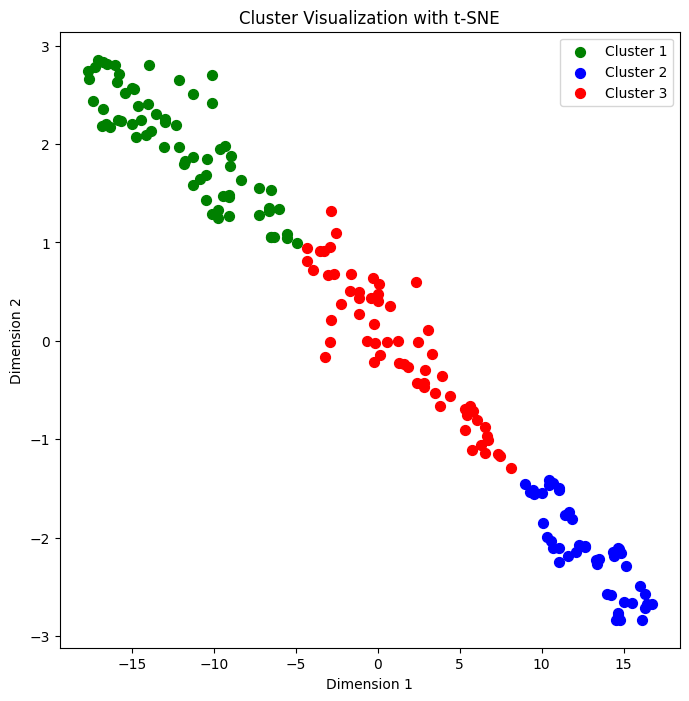

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce to 2 dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df)

# Create a DataFrame with t-SNE components and cluster labels
tsne_df = pd.DataFrame(data=tsne_components, columns=['Dim1', 'Dim2'])
tsne_df['Cluster'] = Y

# Plot the t-SNE components with cluster coloring
plt.figure(figsize=(8, 8))
plt.scatter(tsne_df[tsne_df['Cluster'] == 0]['Dim1'], tsne_df[tsne_df['Cluster'] == 0]['Dim2'], s=50, c='green', label='Cluster 1')
plt.scatter(tsne_df[tsne_df['Cluster'] == 1]['Dim1'], tsne_df[tsne_df['Cluster'] == 1]['Dim2'], s=50, c='blue', label='Cluster 2')
plt.scatter(tsne_df[tsne_df['Cluster'] == 2]['Dim1'], tsne_df[tsne_df['Cluster'] == 2]['Dim2'], s=50, c='red', label='Cluster 3')

# Plot the centroids (optional, as t-SNE does not provide centroids)
#centroids_tsne = tsne.fit_transform(centroids) # If you want to plot centroids

plt.title('Cluster Visualization with t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


# **Sorting the Clusters**

In [ ]:
df['Cluster'] = Y

# Sort the DataFrame by the cluster labels
df_sorted = df.sort_values(by='Cluster')

# Reset the index of the sorted DataFrame
df_sorted = df_sorted.reset_index(drop=True)

# Display the first few rows of the sorted DataFrame
print(df_sorted.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.13        4.10  2.74          24.5         96           2.05   
1    11.46        3.74  1.82          19.5        107           3.18   
2    12.22        1.29  1.94          19.0         92           2.36   
3    12.72        1.75  2.28          22.5         84           1.38   
4    12.25        1.73  2.12          19.0         80           1.65   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        0.76                  0.56             1.35              9.2  0.61   
1        2.58                  0.24             3.58              2.9  0.75   
2        2.04                  0.39             2.08              2.7  0.86   
3        1.76                  0.48             1.63              3.3  0.88   
4        2.03                  0.37             1.63              3.4  1.00   

   OD280  Proline  Cluster  
0   1.60      560        0  
1   2.81      562        0  
2   3

In [ ]:
print(df_sorted.tail())

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
173    13.48        1.81  2.41          20.5        100           2.70   
174    13.28        1.64  2.84          15.5        110           2.60   
175    11.61        1.35  2.70          20.0         94           2.74   
176    13.56        1.71  2.31          16.2        117           3.15   
177    11.64        2.06  2.46          21.6         84           1.95   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
173        2.98                  0.26             1.86             5.10  1.04   
174        2.68                  0.34             1.36             4.60  1.09   
175        2.92                  0.29             2.49             2.65  0.96   
176        3.29                  0.34             2.34             6.13  0.95   
177        1.69                  0.48             1.35             2.80  1.00   

     OD280  Proline  Cluster  
173   3.47      920        2  
174   

In [ ]:
# Generate descriptive statistics for each cluster
for cluster in df_sorted['Cluster'].unique():
    print(f"\nCluster {cluster} Statistics:")
    print(df_sorted[df_sorted['Cluster'] == cluster].describe())



Cluster 0 Statistics:
         Alcohol  Malic_Acid        Ash  Ash_Alcanity   Magnesium  \
count  69.000000   69.000000  69.000000     69.000000   69.000000   
mean   12.516667    2.494203   2.288551     20.823188   92.347826   
std     0.666996    1.262772   0.300633      3.166281   10.359460   
min    11.030000    0.740000   1.360000     10.600000   78.000000   
25%    12.070000    1.510000   2.160000     19.000000   86.000000   
50%    12.420000    2.130000   2.280000     21.000000   88.000000   
75%    12.850000    3.430000   2.460000     22.500000   98.000000   
max    14.130000    5.800000   3.230000     28.500000  123.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count      69.000000   69.000000             69.000000        69.000000   
mean        2.070725    1.758406              0.390145         1.451884   
std         0.562066    0.850848              0.123258         0.561998   
min         0.980000    0.340000              0.170000 

In [ ]:
df_sorted.groupby("Cluster").agg("mean") # to describe qualitative aspect of each cluster

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884
1,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936
2,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710
